<a href="https://colab.research.google.com/github/IlyaSemenovGD/TensorFlow2_0_Udemy/blob/main/Udemy_TF2_Develop_a_Model_to_Predict_Ice_Cream_Sales_Using_Temperature_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT


- You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem.  

- Data set:
  - Input (X): Outside Air Temperature
  - Output (Y): Overall daily revenue generated in dollars

- This example is a regression example, we will cover regression in more details in future projects.


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg"
          width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Predict Ice Cream Sales [Source: https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg]
  </td></tr>
</table>


# STEP #0: IMPORT LIBRARIES

In [23]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASET

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
sales = pd.read_csv('/content/drive/MyDrive/Udemy_TF2_course/SalesData.csv')
sales

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [5]:
sales.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [6]:
sales.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
sales.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# STEP #2: VISUALIZE DATASET

<Axes: xlabel='Temperature', ylabel='Revenue'>

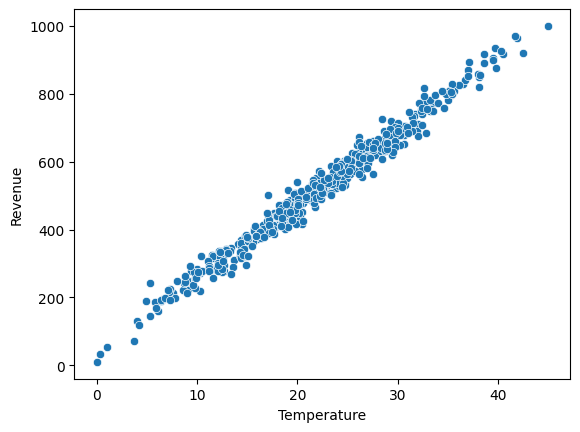

In [10]:
sns.scatterplot(x=sales['Temperature'], y=sales['Revenue'])

# STEP #3: CREATE TESTING AND TRAINING DATASET

In [13]:
X_train = sales['Temperature']
y_train = sales['Revenue']

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


# STEP#4: BUILD AND TRAIN THE MODEL

In [14]:
X_train.shape

(500,)

In [15]:
y_train.shape

(500,)

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.8), loss='mean_squared_error')

In [19]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 203598.7969
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27175.8281  
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1001.7968
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1919.6379 
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 765.8931 
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 788.4532 
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 671.7307 
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 703.1481 
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 665.2992 
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 717.9593
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 695.2272  
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 677.0927 
Epoch 13/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 733.1418 
Epoch 14/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 658.1381 
Epoch 15

# STEP#5: EVALUATE THE MODEL

In [20]:
epochs_hist.history.keys()

dict_keys(['loss'])

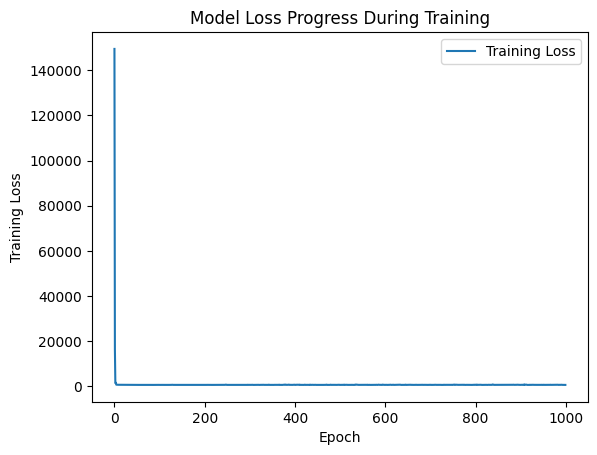

In [21]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [22]:
model.get_weights()

[array([[21.612556]], dtype=float32), array([45.104813], dtype=float32)]

In [24]:
# Use the trained model to perform predictions

Temp = 10
Revenue_pred = model.predict(np.array([Temp]))
print(f"Revenue Predictions Using Trained ANN = {Revenue_pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Revenue Predictions Using Trained ANN = [[261.23038]]


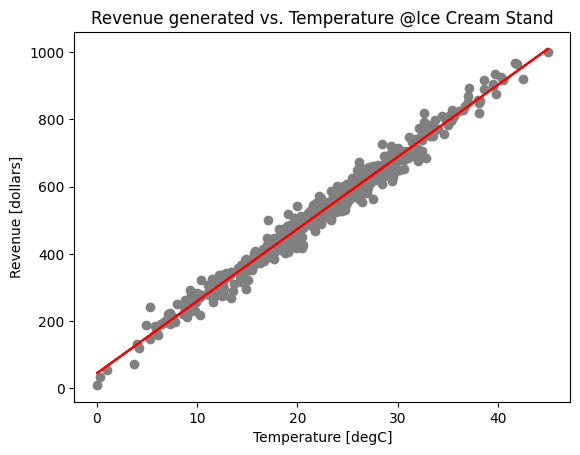

In [31]:
plt.scatter(sales['Temperature'], sales['Revenue'], color='grey')

# Adding labels
plt.xlabel('Temperature [degC]')
plt.ylabel('Revenue [dollars]')
plt.title('Revenue generated vs. Temperature @Ice Cream Stand')

slope, intercept = np.polyfit(sales['Temperature'], sales['Revenue'], 1)
plt.plot(sales['Temperature'], slope * sales['Temperature'] + intercept, color='red')

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

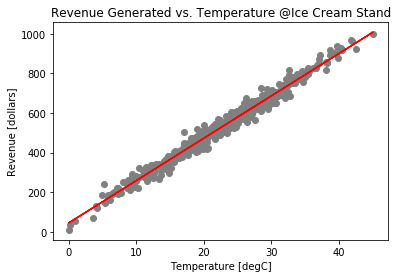

# STEP #6 (OPTIONAL): CONFIRM USING REGRESSION KIT IN SCIKIT LEARN!

In [33]:
X = sales[['Temperature']].values

In [35]:
X.shape

(500, 1)

In [40]:
y = sales['Revenue'].values

In [41]:
y.shape

(500,)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [45]:
slope = model.coef_[0]
intercept = model.intercept_

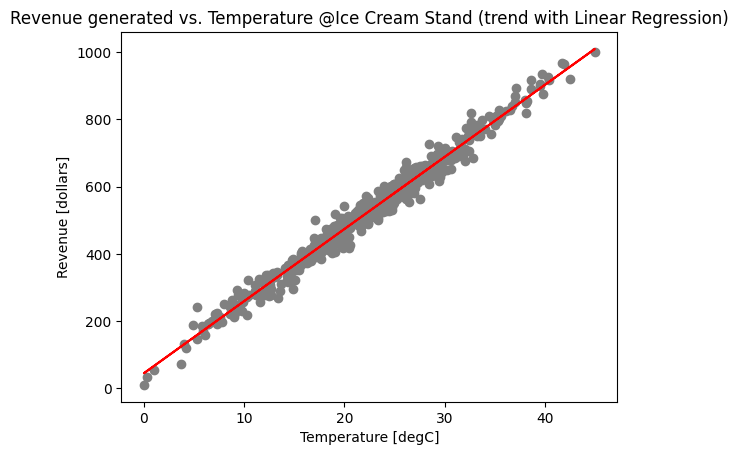

In [47]:
plt.scatter(sales['Temperature'], sales['Revenue'], color='grey')

# Adding labels
plt.xlabel('Temperature [degC]')
plt.ylabel('Revenue [dollars]')
plt.title('Revenue generated vs. Temperature @Ice Cream Stand (trend with Linear Regression)')

plt.plot(sales['Temperature'], slope * sales['Temperature'] + intercept, color='red')

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

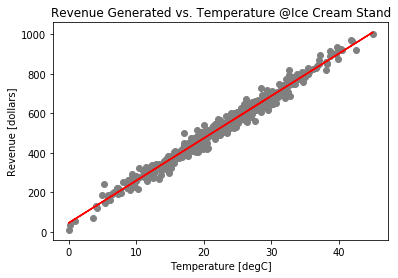

# EXCELLENT JOB & CONGRATULATIONS! NOW YOU HAVE BUILT YOUR SECOND NEURAL NETWORK MODEL USING TENSORFLOW 2.0 IN GOOGLE COLAB!